## Setup

In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 15
pd.options.display.float_format = '{:.2f}'.format

eyetrack_analytics_dataframe = pd.read_csv("./eye_track_dataset.csv", sep=",")
eyetrack_analytics_dataframe = eyetrack_analytics_dataframe.reindex(
    np.random.permutation(eyetrack_analytics_dataframe.index))

In [2]:
def preprocess_features(eyetrack_analytics_dataframe):
    """Prepares input features from Eyetrack analytics data set.
    Args:
        eyetrack_analytics_dataframe: A Pandas DataFrame expected to contain data
            from the Eyetrack analytics data set.
    Returns:
        A DataFrame that contains the features to be used for the model, including.
    """
    selected_features = eyetrack_analytics_dataframe[[
#         "participant",
        "position",
        "area",
        "color_hvc_counting",
        "large_white_space_percentage",
        "total_white_space",
        "ccm_gau3_color_radius30",
        "ccm_gaussian2",
        "ccm_gaussian3",
        "avg_hue",
        "avg_saturation",
        "avg_lightness",
        "canny_edge",
        "sobel_edge"]]
    processed_features = selected_features.copy()
    processed_features['area'] = (processed_features['area'] / 10000)
    return processed_features

def preprocess_targets(eyetrack_analytics_dataframe):
    """Prepares target features (i.e., labels) from Eyetrack analytics data set.

    Args:
        california_housing_dataframe: A Pandas DataFrame expected to contain data
        from the Eyetrack analytics data set.
    Returns:
        A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Scale the target to be in units of thousands of dollars.
    output_targets["fixation_duration_persentage"] = (
        eyetrack_analytics_dataframe["fixation_duration_persentage"])
    return output_targets

In [3]:
css = """
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 640px;
border-collapse:
collapse; 
border-spacing: 0;
}
td, th {
border: 1px solid transparent; /* No more visible border */
height: 30px;
}
th {
background: #DFDFDF; /* Darken header a bit */
font-weight: bold;
}
td {
background: #FAFAFA;
text-align: center;
}
table tr:nth-child(odd) td{
background-color: white;
}
</style>
"""

In [5]:
# Set the partation
total_examples = len(eyetrack_analytics_dataframe)
training_partation = int(total_examples * 0.65)
validation_partation = int(total_examples * 0.20)
test_paration = int(total_examples - training_partation - validation_partation)

# Choose the first 7000 (out of 10834) examples for training.
training_examples = preprocess_features(
    eyetrack_analytics_dataframe
    .head(training_partation))
training_targets = preprocess_targets(
    eyetrack_analytics_dataframe
    .head(training_partation))

# Choose the last 2500 (out of 10834) examples for validation.
validation_examples = preprocess_features(
    eyetrack_analytics_dataframe
    .head(training_partation + validation_partation)
    .tail(validation_partation))
validation_targets = preprocess_targets(
    eyetrack_analytics_dataframe
    .head(training_partation + validation_partation)
    .tail(validation_partation))

# Choose the last 1334 (out of 10834) examples for validation.
test_examples = preprocess_features(
    eyetrack_analytics_dataframe
    .tail(test_paration))
test_targets = preprocess_targets(
    eyetrack_analytics_dataframe
    .tail(test_paration))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
training_examples.describe().to_csv(path_or_buf='dataset_exploration/training_examples_description.csv',sep=',')
text_file = open("dataset_exploration/training_examples_description.html", "a")
text_file.write(css)
text_file.write(training_examples.describe().to_html())
text_file.close()

print("Validation examples summary:")
display.display(validation_examples.describe())
validation_examples.describe().to_csv(path_or_buf='dataset_exploration/validation_examples_description.csv',sep=',')
text_file = open("dataset_exploration/validation_examples_description.html", "a")
text_file.write(css)
text_file.write(validation_examples.describe().to_html())
text_file.close()

print("Test examples summary:")
display.display(test_examples.describe())
test_examples.describe().to_csv(path_or_buf='dataset_exploration/test_examples_description.csv',sep=',')
text_file = open("dataset_exploration/test_examples_description.html", "a")
text_file.write(css)
text_file.write(test_examples.describe().to_html())
text_file.close()

print("Training targets summary:")
display.display(training_targets.describe())
training_targets.describe().to_csv(path_or_buf='dataset_exploration/training_targets_description.csv',sep=',')
text_file = open("dataset_exploration/training_targets_description.html", "a")
text_file.write(css)
text_file.write(training_targets.describe().to_html())
text_file.close()

print("Validation targets summary:")
display.display(validation_targets.describe())
validation_targets.describe().to_csv(path_or_buf='dataset_exploration/validation_targets_description.csv',sep=',')
text_file = open("dataset_exploration/validation_targets_description.html", "a")
text_file.write(css)
text_file.write(validation_targets.describe().to_html())
text_file.close()

print("Test targets summary:")
display.display(test_targets.describe())
test_targets.describe().to_csv(path_or_buf='dataset_exploration/test_targets_description.csv',sep=',')
text_file = open("dataset_exploration/test_targets_description.html", "a")
text_file.write(css)
text_file.write(test_targets.describe().to_html())
text_file.close()

Training examples summary:


,position,area,color_hvc_counting,large_white_space_percentage,total_white_space,ccm_gau3_color_radius30,ccm_gaussian2,ccm_gaussian3,avg_hue,avg_saturation,avg_lightness,canny_edge,sobel_edge
count,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00
mean,4.83,9.22,0.34,0.36,0.73,234.26,412.01,348.53,0.19,0.11,0.86,0.07,0.05
std,2.89,2.32,0.13,0.12,0.15,150.52,140.25,122.30,0.08,0.09,0.09,0.01,0.01
min,1.00,3.50,0.08,0.09,0.42,0.00,107.93,89.09,0.05,0.01,0.46,0.05,0.02
25%,2.00,8.61,0.26,0.29,0.64,139.66,308.97,257.29,0.13,0.04,0.82,0.06,0.04
50%,5.00,8.92,0.36,0.36,0.77,205.31,440.84,364.46,0.17,0.08,0.87,0.07,0.05
75%,7.00,11.13,0.44,0.46,0.84,292.61,529.72,446.43,0.23,0.15,0.92,0.09,0.05
max,16.00,13.35,0.62,0.62,0.95,736.20,690.55,637.90,0.48,0.41,0.98,0.12,0.07


Validation examples summary:


,position,area,color_hvc_counting,large_white_space_percentage,total_white_space,ccm_gau3_color_radius30,ccm_gaussian2,ccm_gaussian3,avg_hue,avg_saturation,avg_lightness,canny_edge,sobel_edge
count,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00,2166.00
mean,4.82,9.19,0.34,0.36,0.73,229.18,405.76,344.72,0.18,0.11,0.86,0.07,0.05
std,2.91,2.32,0.14,0.13,0.15,150.32,140.61,122.04,0.08,0.09,0.09,0.01,0.01
min,1.00,3.50,0.08,0.09,0.42,0.00,107.93,89.09,0.05,0.01,0.46,0.05,0.02
25%,2.00,8.61,0.25,0.29,0.65,128.56,294.15,254.08,0.13,0.04,0.82,0.06,0.04
50%,5.00,8.92,0.35,0.36,0.78,204.34,428.69,359.55,0.17,0.08,0.87,0.07,0.05
75%,7.00,9.16,0.45,0.46,0.85,283.45,511.47,433.79,0.23,0.15,0.92,0.09,0.05
max,16.00,13.35,0.62,0.62,0.95,736.20,690.55,637.90,0.48,0.41,0.98,0.12,0.07


Test examples summary:


,position,area,color_hvc_counting,large_white_space_percentage,total_white_space,ccm_gau3_color_radius30,ccm_gaussian2,ccm_gaussian3,avg_hue,avg_saturation,avg_lightness,canny_edge,sobel_edge
count,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00,1626.00
mean,4.69,9.25,0.34,0.35,0.73,237.34,410.88,350.94,0.19,0.11,0.86,0.07,0.05
std,2.81,2.27,0.14,0.13,0.15,153.22,142.08,124.35,0.08,0.09,0.09,0.02,0.01
min,1.00,3.50,0.08,0.09,0.42,0.00,107.93,89.09,0.05,0.01,0.46,0.05,0.02
25%,2.00,8.61,0.23,0.28,0.64,142.35,305.50,257.58,0.13,0.04,0.82,0.06,0.04
50%,4.00,8.92,0.34,0.36,0.77,208.39,440.66,377.47,0.17,0.08,0.87,0.07,0.05
75%,7.00,9.16,0.44,0.45,0.84,294.15,529.72,446.43,0.24,0.15,0.92,0.09,0.05
max,16.00,13.35,0.62,0.62,0.95,736.20,690.55,637.90,0.48,0.41,0.98,0.12,0.07


Training targets summary:


,fixation_duration_persentage
count,7042.00
mean,0.82
std,0.24
min,0.01
25%,0.78
50%,0.93
75%,0.97
max,1.00


Validation targets summary:


,fixation_duration_persentage
count,2166.00
mean,0.81
std,0.24
min,0.01
25%,0.77
50%,0.93
75%,0.97
max,1.00


Test targets summary:


,fixation_duration_persentage
count,1626.00
mean,0.82
std,0.24
min,0.01
25%,0.79
50%,0.93
75%,0.97
max,1.00


In [6]:
correlation_dataframe = training_examples.copy()
correlation_dataframe["target"] = training_targets["fixation_duration_persentage"]

correlation_dataframe.corr().to_csv(path_or_buf='correlation/correlation.csv',sep=',')
text_file = open("correlation/correlation.html", "a")
text_file.write(css)
text_file.write(correlation_dataframe.corr().to_html())
text_file.close()
correlation_dataframe.corr()

,position,area,color_hvc_counting,large_white_space_percentage,total_white_space,ccm_gau3_color_radius30,ccm_gaussian2,ccm_gaussian3,avg_hue,avg_saturation,avg_lightness,canny_edge,sobel_edge,target
position,1.00,-0.30,0.12,0.12,0.01,-0.11,0.05,-0.03,0.05,0.09,0.05,-0.05,-0.13,0.07
area,-0.30,1.00,-0.15,-0.18,0.38,-0.17,-0.56,-0.41,-0.39,-0.32,0.38,-0.32,0.04,-0.02
color_hvc_counting,0.12,-0.15,1.00,0.85,0.61,-0.53,-0.02,-0.23,-0.35,-0.55,0.47,-0.45,-0.39,0.01
large_white_space_percentage,0.12,-0.18,0.85,1.00,0.63,-0.56,-0.17,-0.14,-0.38,-0.57,0.48,-0.48,-0.50,0.01
total_white_space,0.01,0.38,0.61,0.63,1.00,-0.89,-0.68,-0.73,-0.63,-0.81,0.86,-0.63,-0.29,-0.00
ccm_gau3_color_radius30,-0.11,-0.17,-0.53,-0.56,-0.89,1.00,0.75,0.84,0.54,0.75,-0.88,0.49,0.26,0.00
ccm_gaussian2,0.05,-0.56,-0.02,-0.17,-0.68,0.75,1.00,0.86,0.53,0.62,-0.74,0.43,0.20,0.01
ccm_gaussian3,-0.03,-0.41,-0.23,-0.14,-0.73,0.84,0.86,1.00,0.51,0.63,-0.78,0.38,0.08,0.01
avg_hue,0.05,-0.39,-0.35,-0.38,-0.63,0.54,0.53,0.51,1.00,0.70,-0.49,0.46,0.39,0.01
avg_saturation,0.09,-0.32,-0.55,-0.57,-0.81,0.75,0.62,0.63,0.70,1.00,-0.61,0.62,0.40,0.02


In [7]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [8]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    feature_columns,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model.
  
    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.
  
    Args:
        learning_rate: A `float`, the learning rate.
        steps: A non-zero `int`, the total number of training steps. A training step
            consists of a forward and backward pass using a single batch.
        feature_columns: A `set` specifying the input feature columns to use.
        training_examples: A `DataFrame` containing one or more columns from
            `eyetrack_analytics_dataframe` to use as input features for training.
        training_targets: A `DataFrame` containing exactly one column from
            `eyetrack_analytics_dataframe` to use as target for training.
        validation_examples: A `DataFrame` containing one or more columns from
            `eyetrack_analytics_dataframe` to use as input features for validation.
        validation_targets: A `DataFrame` containing exactly one column from
            `eyetrack_analytics_dataframe` to use as target for validation.
      
    Returns:
        A `LinearRegressor` object trained on the training data.
    """

    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=feature_columns,
        optimizer=my_optimizer
    )
  
    training_input_fn = lambda: my_input_fn(training_examples, 
                                            training_targets["fixation_duration_persentage"], 
                                            batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                    training_targets["fixation_duration_persentage"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                      validation_targets["fixation_duration_persentage"], 
                                                      num_epochs=1, 
                                                      shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")
    
    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()
    plt.savefig('legend.png')
    
    return linear_regressor

In [9]:
def get_quantile_based_boundaries(feature_values, num_buckets):
    boundaries = np.arange(1.0, num_buckets) / num_buckets
    quantiles = feature_values.quantile(boundaries)
    return [quantiles[q] for q in quantiles.keys()]

In [19]:
def construct_feature_columns():
    """Construct the TensorFlow Feature Columns.
    Returns:
        A set of feature columns
    """
    position = tf.feature_column.numeric_column("position")
    area = tf.feature_column.numeric_column("area")
    color_hvc_counting = tf.feature_column.numeric_column("color_hvc_counting")
    large_white_space_percentage = tf.feature_column.numeric_column("large_white_space_percentage")
    total_white_space = tf.feature_column.numeric_column("total_white_space")
    ccm_gau3_color_radius30 = tf.feature_column.numeric_column("ccm_gau3_color_radius30")
    ccm_gaussian2 = tf.feature_column.numeric_column("ccm_gaussian2")
    ccm_gaussian3 = tf.feature_column.numeric_column("ccm_gaussian3")
    avg_hue = tf.feature_column.numeric_column("avg_hue")
    avg_saturation = tf.feature_column.numeric_column("avg_saturation")
    avg_lightness = tf.feature_column.numeric_column("avg_lightness")
    canny_edge = tf.feature_column.numeric_column("canny_edge")
    sobel_edge = tf.feature_column.numeric_column("sobel_edge")
    
    bucketized_position = tf.feature_column.bucketized_column(
        position, boundaries=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
    
    bucketized_area = tf.feature_column.bucketized_column(
        area, boundaries=get_quantile_based_boundaries(
            training_examples["area"], 10))
    
    bucketized_color_hvc_counting = tf.feature_column.bucketized_column(
        color_hvc_counting, boundaries=get_quantile_based_boundaries(
            training_examples["color_hvc_counting"], 10))
    
    bucketized_large_white_space_percentage = tf.feature_column.bucketized_column(
        large_white_space_percentage, boundaries=get_quantile_based_boundaries(
            training_examples["large_white_space_percentage"], 10))
    
    bucketized_total_white_space = tf.feature_column.bucketized_column(
        total_white_space, boundaries=get_quantile_based_boundaries(
            training_examples["total_white_space"], 10))
    
    bucketized_ccm_gau3_color_radius30 = tf.feature_column.bucketized_column(
        ccm_gau3_color_radius30, boundaries=get_quantile_based_boundaries(
            training_examples["ccm_gau3_color_radius30"], 10))
    
    bucketized_ccm_gaussian2 = tf.feature_column.bucketized_column(
        ccm_gaussian2, boundaries=get_quantile_based_boundaries(
            training_examples["ccm_gaussian2"], 10))
    
    bucketized_ccm_gaussian3 = tf.feature_column.bucketized_column(
        ccm_gaussian3, boundaries=get_quantile_based_boundaries(
            training_examples["ccm_gaussian3"], 10))
    
    bucketized_avg_hue = tf.feature_column.bucketized_column(
        avg_hue, boundaries=get_quantile_based_boundaries(
            training_examples["avg_hue"], 10))
    
    bucketized_avg_saturation = tf.feature_column.bucketized_column(
        avg_saturation, boundaries=get_quantile_based_boundaries(
            training_examples["avg_saturation"], 10))
    
    bucketized_avg_lightness = tf.feature_column.bucketized_column(
        avg_lightness, boundaries=get_quantile_based_boundaries(
            training_examples["avg_lightness"], 10))
    
    bucketized_canny_edge = tf.feature_column.bucketized_column(
        canny_edge, boundaries=get_quantile_based_boundaries(
            training_examples["canny_edge"], 10))
    
    bucketized_sobel_edge = tf.feature_column.bucketized_column(
        sobel_edge, boundaries=get_quantile_based_boundaries(
            training_examples["sobel_edge"], 10))
    
    position_x_area = tf.feature_column.crossed_column(
        set([bucketized_position, bucketized_area]), hash_bucket_size=1000) 
    gaussian2_x_gaussian3 = tf.feature_column.crossed_column(
        set([bucketized_ccm_gaussian2, bucketized_ccm_gaussian3]), hash_bucket_size=1000)
    hue_x_saturation = tf.feature_column.crossed_column(
        set([bucketized_avg_hue, bucketized_avg_saturation]), hash_bucket_size=1000)
    
    feature_columns = set([
        bucketized_position,
        bucketized_area,
        bucketized_color_hvc_counting,
        bucketized_large_white_space_percentage,
        bucketized_total_white_space,
        bucketized_ccm_gau3_color_radius30,
        bucketized_ccm_gaussian2,
        bucketized_ccm_gaussian3,
        bucketized_avg_hue,
        bucketized_avg_saturation,
        bucketized_avg_lightness,
        bucketized_canny_edge,
        bucketized_sobel_edge
    ])
    
    return feature_columns

Training model...
RMSE (on training data):
  period 00 : 0.45
  period 01 : 0.32
  period 02 : 0.27
  period 03 : 0.25
  period 04 : 0.25
  period 05 : 0.25
  period 06 : 0.24
  period 07 : 0.24
  period 08 : 0.24
  period 09 : 0.24
Model training finished.


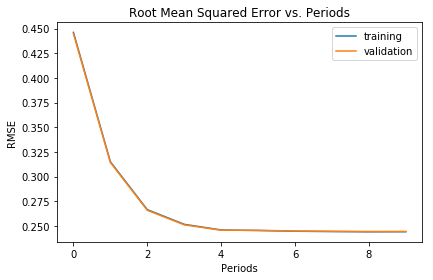

In [20]:
linear_regressor = train_model(
    learning_rate=0.003,
    steps=1000,
    batch_size=5,
    feature_columns=construct_feature_columns(),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [13]:
property_names = linear_regressor.get_variable_names()[0:]
# property_names

In [17]:
weights = pd.DataFrame()
for property_name in property_names:
    property_weights = linear_regressor.get_variable_value(property_name).flatten()
    property_name = property_name.replace('/', '_')
    print(property_name)
    temp = pd.DataFrame({'property_weights': property_weights})
    
    
    temp.to_csv(path_or_buf='weights/'+ property_name +'.csv',sep=',')
    text_file = open('weights/'+ property_name +'.html', "a")
    text_file.write(css)
    text_file.write(temp.to_html())
    text_file.close()
    display.display(temp)
    

global_step


,property_weights
0,700


linear_linear_model_area_bucketized_weights


,property_weights
0,-0.00
1,0.35
2,0.16
3,0.29
4,0.21
5,0.28
6,0.38
7,0.12
8,0.23
9,0.37


linear_linear_model_area_bucketized_weights_part_0_Ftrl


,property_weights
0,192.70
1,125.83
2,178.05
3,190.91
4,174.38
5,163.83
6,154.71
7,182.90
8,174.09
9,153.55


linear_linear_model_area_bucketized_weights_part_0_Ftrl_1


,property_weights
0,0.03
1,-1.99
2,-1.04
3,-2.00
4,-1.37
5,-1.77
6,-2.34
7,-0.78
8,-1.52
9,-2.29


linear_linear_model_avg_hue_bucketized_weights


,property_weights
0,0.05
1,-0.09
2,0.12
3,-0.01
4,-0.08
5,-0.01
6,0.19
7,0.19
8,-0.07
9,0.13


linear_linear_model_avg_hue_bucketized_weights_part_0_Ftrl


,property_weights
0,154.67
1,153.97
2,161.39
3,146.76
4,186.41
5,176.61
6,169.66
7,196.72
8,168.29
9,180.22


linear_linear_model_avg_hue_bucketized_weights_part_0_Ftrl_1


,property_weights
0,-0.33
1,0.54
2,-0.77
3,0.03
4,0.56
5,0.09
6,-1.21
7,-1.34
8,0.43
9,-0.87


linear_linear_model_avg_lightness_bucketized_weights


,property_weights
0,0.08
1,-0.07
2,0.28
3,0.08
4,0.10
5,0.16
6,0.11
7,0.05
8,0.17
9,0.34


linear_linear_model_avg_lightness_bucketized_weights_part_0_Ftrl


,property_weights
0,183.29
1,184.92
2,208.07
3,158.26
4,170.07
5,162.40
6,172.26
7,158.23
8,167.83
9,169.08


linear_linear_model_avg_lightness_bucketized_weights_part_0_Ftrl_1


,property_weights
0,-0.55
1,0.45
2,-2.05
3,-0.49
4,-0.66
5,-1.04
6,-0.74
7,-0.30
8,-1.07
9,-2.20


linear_linear_model_avg_saturation_bucketized_weights


,property_weights
0,0.05
1,-0.11
2,-0.03
3,0.04
4,-0.05
5,0.11
6,-0.14
7,-0.10
8,-0.21
9,-0.02


linear_linear_model_avg_saturation_bucketized_weights_part_0_Ftrl


,property_weights
0,192.87
1,158.47
2,160.56
3,164.95
4,178.37
5,181.04
6,166.74
7,173.22
8,172.04
9,208.23


linear_linear_model_avg_saturation_bucketized_weights_part_0_Ftrl_1


,property_weights
0,-0.37
1,0.70
2,0.19
3,-0.27
4,0.35
5,-0.75
6,0.89
7,0.65
8,1.40
9,0.11


linear_linear_model_bias_weights


,property_weights
0,0.16


linear_linear_model_bias_weights_part_0_Ftrl


,property_weights
0,3895.41


linear_linear_model_bias_weights_part_0_Ftrl_1


,property_weights
0,-4.95


linear_linear_model_canny_edge_bucketized_weights


,property_weights
0,-0.46
1,-0.29
2,-0.14
3,-0.13
4,-0.15
5,-0.23
6,-0.01
7,-0.25
8,-0.13
9,0.06


linear_linear_model_canny_edge_bucketized_weights_part_0_Ftrl


,property_weights
0,154.82
1,194.09
2,184.12
3,153.61
4,158.66
5,164.84
6,166.53
7,169.13
8,166.80
9,178.08


linear_linear_model_canny_edge_bucketized_weights_part_0_Ftrl_1


,property_weights
0,2.89
1,2.02
2,0.97
3,0.79
4,0.97
5,1.48
6,0.08
7,1.65
8,0.87
9,-0.39


linear_linear_model_ccm_gaussian2_bucketized_weights


,property_weights
0,-0.06
1,0.01
2,-0.06
3,-0.02
4,0.15
5,-0.06
6,-0.13
7,0.01
8,-0.07
9,-0.14


linear_linear_model_ccm_gaussian2_bucketized_weights_part_0_Ftrl


,property_weights
0,162.94
1,156.84
2,182.89
3,155.94
4,157.46
5,169.99
6,166.39
7,177.23
8,166.88
9,211.32


linear_linear_model_ccm_gaussian2_bucketized_weights_part_0_Ftrl_1


,property_weights
0,0.37
1,-0.04
2,0.43
3,0.14
4,-0.91
5,0.37
6,0.84
7,-0.06
8,0.45
9,1.02


linear_linear_model_color_hvc_counting_bucketized_weights


,property_weights
0,-0.05
1,0.12
2,0.18
3,0.19
4,-0.10
5,0.08
6,0.01
7,0.02
8,0.17
9,0.09


linear_linear_model_color_hvc_counting_bucketized_weights_part_0_Ftrl


,property_weights
0,161.58
1,194.31
2,141.66
3,144.11
4,183.47
5,171.30
6,142.29
7,132.06
8,167.96
9,226.97


linear_linear_model_color_hvc_counting_bucketized_weights_part_0_Ftrl_1


,property_weights
0,0.30
1,-0.82
2,-1.07
3,-1.16
4,0.70
5,-0.54
6,-0.07
7,-0.10
8,-1.11
9,-0.71


linear_linear_model_position_bucketized_weights


,property_weights
0,0.00
1,0.00
2,0.29
3,0.18
4,0.19
5,0.15
6,0.33
...,...
11,0.44
12,-0.04


linear_linear_model_position_bucketized_weights_part_0_Ftrl


,property_weights
0,0.10
1,0.10
2,247.41
3,220.73
4,217.47
5,161.47
6,157.93
...,...
11,23.13
12,23.13


linear_linear_model_position_bucketized_weights_part_0_Ftrl_1


,property_weights
0,0.00
1,0.00
2,-2.30
3,-1.35
4,-1.41
5,-0.98
6,-2.05
...,...
11,-1.06
12,0.10


In [14]:
predict_test_input_fn = lambda: my_input_fn(
    test_examples, 
    test_targets["fixation_duration_persentage"], 
    num_epochs=1, 
    shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])
targets = test_targets.copy()
targets = np.array(test_targets['fixation_duration_persentage'])

root_mean_squared_error = math.sqrt(
    metrics.mean_squared_error(test_predictions, test_targets))

print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

fixation_duration = pd.DataFrame()
fixation_duration["targets"] = pd.Series(targets)
fixation_duration["predictions"] = pd.Series(test_predictions)
fixation_duration.to_csv(path_or_buf='output.csv',sep=',')

Final RMSE (on test data): 0.42


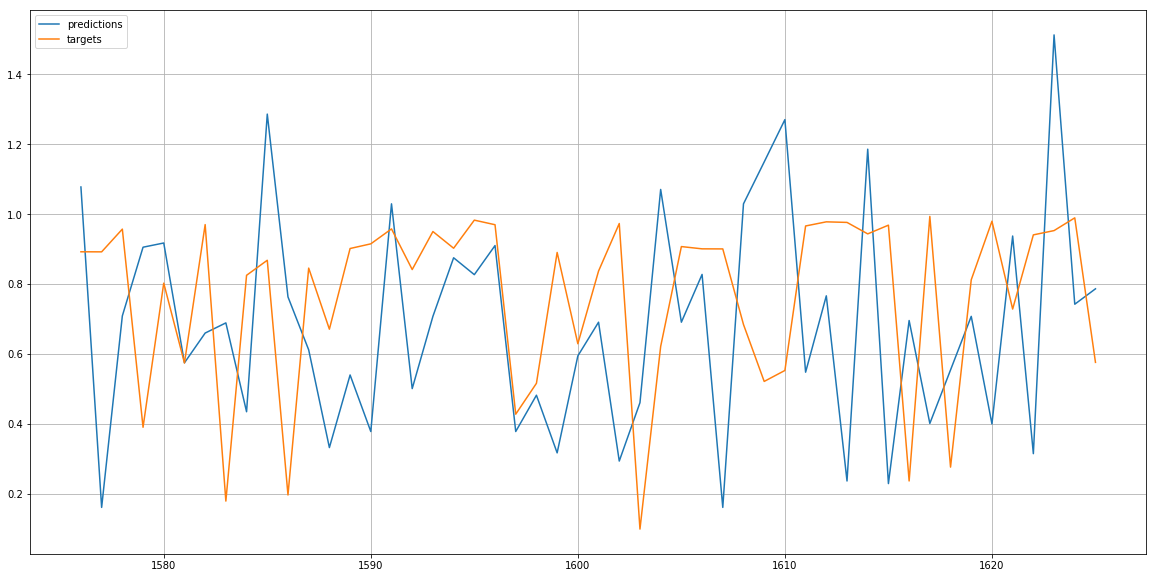

In [15]:
fixation_duration[-50:].plot(y =['predictions', 'targets'], figsize=(20,10), grid=True)